# Исследование данных

1. Ранее, в блокноте `00_fetch_data_hh.ipynb` проработали подход к сбору данных о вакансиях с помощью API HeadHunter
2. Перенесли наработки в скрипт `etl\fetch_hh.py`, проверили его работоспособность
3. С помощью Github Actions настроили автоматическое обновление (пополнение) базы вакансий

Переходим к исследованию данных и формированию подходов к их дальнейшему использованию

## Импорт библиотек и загрузка данных

In [94]:
import pandas as pd



import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option("display.max_colwidth", 200)
sns.set_style("whitegrid")


url = "https://izemenkov.github.io/skillgrow/data/raw_data/vacancies_master.csv"
df = pd.read_csv(url)

df.head()

,id,name,area,experience,key_skills,description
0,127202494,ML-аналитик / Data Scientist,Москва,Нет опыта,NaN,"Обязанности: Моделирование клиентского поведения, прогнозирование оттока; Работа в Yandex DataSphere, создание и тренировка ML-моделей; Подготовка данных для моделей (ETL-процессы, очистка, фичи)..."
1,127244399,Аналитик данных/Data Analyst,Нижний Новгород,Нет опыта,"Python, SQL, Базы данных, Анализ данных","Ищем специалиста, готового влиться в команду профессионалов в один из крупнейших банков страны. Сегодня мы в поиске Аналитика данных. Основные обязанности: Работа в функциональной команде, нацеле..."
2,126209623,"Стажер, Data Analyst / Data Scientist",Москва,Нет опыта,"Python, pandas, Numpy, ООП, Алгоритмы и структуры данных, Git, MS SQL, Big Data, VBA, PyTorch",В сегодняшней бизнес-среде компаниям необходимо понимание стоимости и прибыльности их продукции. Благодаря сочетанию практического опыта и значительных академических знаний Группа цифровых финансо...
3,127192646,Младший аналитик данных/Junior Data Analyst,Москва,От 1 года до 3 лет,"Python, SQL, Аналитическое мышление, Исследовательский анализ данных, Математическая статистика, Интерпретация данных, Регрессионный анализ","Mediascope – исследовательская компания, которая работает на стыке медиа и IТ. Мы анализируем аудиторию телевидения, интернета, радио и прессы, поставляем данные и создаем уникальные аналитические..."
4,126562421,Junior Data Analyst/Аналитик данных,Казань,Нет опыта,NaN,"Привет! Мы команда разработчиков платформы Young&Junior, которая собирает вакансии со всех интернет-ресурсов. Сейчас нашим сайтом пользуется 30 000 человек ежемесячно, и мы активно растем, поэтому..."


## Работа с данными

In [95]:
# Первичный осмотр
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           478 non-null    int64 
 1   name         478 non-null    object
 2   area         478 non-null    object
 3   experience   478 non-null    object
 4   key_skills   252 non-null    object
 5   description  478 non-null    object
dtypes: int64(1), object(5)
memory usage: 22.5+ KB


,id,name,area,experience,key_skills,description
count,4.780000e+02,478,478,478,252,478
unique,NaN,352,25,4,222,442
top,NaN,Data Scientist,Москва,От 3 до 6 лет,"Big Data, pandas, Математическая статистика, SQL, Git, ETL, Hadoop, Java, Python, Groovy, Atlassian Jira, Atlassian Confluence","«Lean Software Production» — глобальная ИТ-компания, которая занимается созданием ПО и формированием выделенных команд разработки. Мы объединяем лучших экспертов со всего мира, для которых создани..."
freq,NaN,40,374,258,8,6
mean,1.260173e+08,NaN,NaN,NaN,NaN,NaN
std,1.867995e+06,NaN,NaN,NaN,NaN,NaN
min,1.075312e+08,NaN,NaN,NaN,NaN,NaN
25%,1.258251e+08,NaN,NaN,NaN,NaN,NaN
50%,1.266432e+08,NaN,NaN,NaN,NaN,NaN
75%,1.270403e+08,NaN,NaN,NaN,NaN,NaN


In [96]:
# Топ городов
df['area'].value_counts().head(15)

area
Москва                              374
Санкт-Петербург                      47
Казань                                9
Новосибирск                           9
Нижний Новгород                       7
Екатеринбург                          5
Томск                                 3
Владивосток                           2
Пермь                                 2
Самара                                2
Омск                                  2
Краснодар                             2
Красногорск (Московская область)      2
Ростов-на-Дону                        1
Иркутск                               1
Name: count, dtype: int64

In [97]:
# Распределение опыта
df['experience'].value_counts()

experience
От 3 до 6 лет         258
От 1 года до 3 лет    157
Более 6 лет            42
Нет опыта              21
Name: count, dtype: int64

Text(0.5, 1.0, 'Топ городов по количеству вакансий')

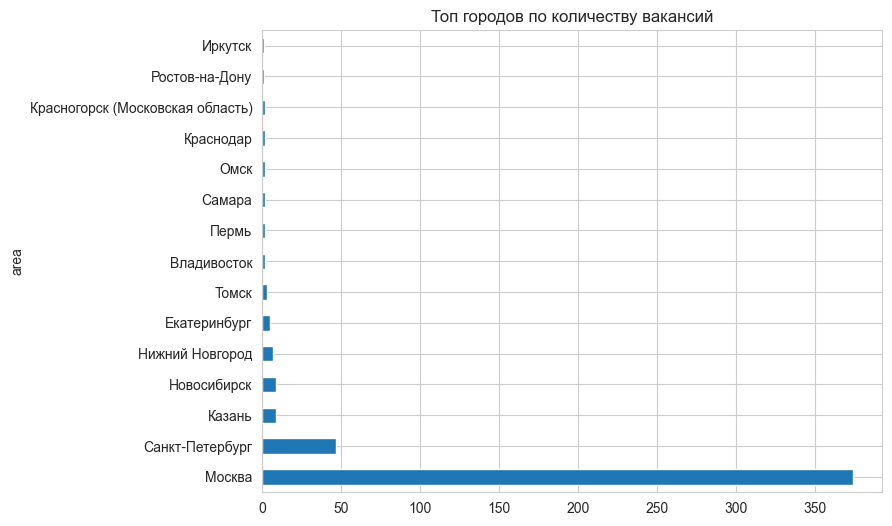

In [98]:
# Посмотрим на данные о географии вакансий и требуемом опыте визуально

df['area'].value_counts().head(15).plot(kind='barh', figsize=(8,6))
plt.title("Топ городов по количеству вакансий")


Text(0.5, 1.0, 'Требуемый уровень опыта')

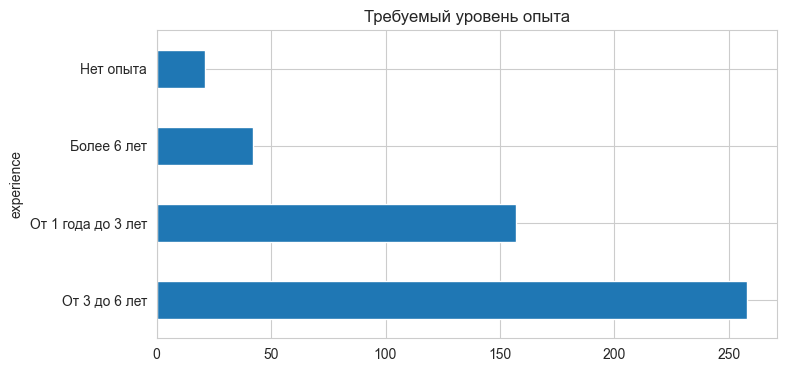

In [99]:

df['experience'].value_counts().plot(kind='barh', figsize=(8,4))
plt.title("Требуемый уровень опыта")

### Исследование столбца "Ключевые навыки"

In [100]:
# доля пустых key_skills
share_empty = df['key_skills'].isna().mean() * 100
print(f"Доля вакансий без key_skills: {share_empty:.1f}%")

Доля вакансий без key_skills: 47.3%


Видим, что почти у половины вакансий ключевые навыки не заполнены. Потребуется либо строить рекомендации только на вакансиях с заполненными навыками, либо (что более правильно) извлечь навыки из описания вакансий.
Проверим, на всякий случай, отсутствие пустых полей описаний

In [101]:
# доля пустых description
share_empty = df['description'].isna().mean() * 100
print(f"Доля вакансий без description: {share_empty:.1f}%")

Доля вакансий без description: 0.0%


Все описания заполнены и могут быть применены для извлечения навыков

In [102]:
# Выделим навыки в отдельный столбец списков

def parse_skills(x):
    if pd.isna(x) or not str(x).strip():
        return []
    parts = [s.strip().lower() for s in str(x).split(',')]
    parts = [p for p in parts if p]                  # убрать пустые
    return sorted(set(parts))                        # уникальные

df['skills_list'] = df['key_skills'].apply(parse_skills)

df.skills_list.sample(5)

121                      [pyspark, python, sql]
37                                     [python]
246                                          []
355            [deep learning, ml, python, sql]
191    [python, r, sql, tableau, анализ данных]
Name: skills_list, dtype: object

In [103]:
# Построим рейтинг навыков (топ-20)
skills_exploded = df.explode('skills_list')
top_all = (skills_exploded['skills_list']
           .dropna()
           .value_counts()
           .head(20)
           .rename_axis('skill')
           .reset_index(name='count'))
top_all

,skill,count
0,python,190
1,sql,140
2,pandas,44
3,pytorch,37
4,big data,36
5,ml,35
6,анализ данных,34
7,математическая статистика,31
8,numpy,24
9,hadoop,23


In [104]:
# Также оценим топ навыков, исходя из опыта

top_by_exp = (skills_exploded
              .dropna(subset=['skills_list'])
              .groupby(['experience','skills_list'])
              .size()
              .reset_index(name='count'))

def top_k_per_group(df_g, k=20):
    return (df_g.sort_values(['experience','count'], ascending=[True, False])
             .groupby('experience')
             .head(k))

top_exp_20 = top_k_per_group(top_by_exp, k=20)
top_exp_20

,experience,skills_list,count
41,Более 6 лет,python,18
48,Более 6 лет,sql,16
5,Более 6 лет,big data,11
55,Более 6 лет,математическая статистика,10
13,Более 6 лет,etl,9
...,...,...,...
453,От 3 до 6 лет,разработка поисковых технологий,11
285,От 3 до 6 лет,a/b тесты,10
345,От 3 до 6 лет,llm,10
392,От 3 до 6 лет,scikit-learn,10


В Целом видим следующую картину:
* В топе навыки: `python`,`sql`,`pandas`, `статистика` и т.п.
* Есть синонимы, потребуется мэпинг
* С ростом опыта в требованиях появляются более конкретные навыки: `ETL`, `DWH`, `Hadoop`, `Clickhouse`, `Groovy`, `Java` + процессы: `Confluence`, `Jira`

Учитывая уровень заполненности поля `key_skills` (около 50%), попробуем извлечь навыки из описаний вакансий (см. `02_skill_extraction.ipynb`)